# Neural Network Project


#  Import Librabries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [31]:
import tensorflow as tf

In [32]:
import keras

In [33]:
tf.__version__

'2.1.0'

# Loading Data Set

In [34]:
import h5py

In [35]:
h5f=h5py.File('SVHN_single_grey1.h5',mode='r')

In [36]:
# Views available from member names( help taken from Github)
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [37]:
# Creating the dataset
X_train=h5f['X_train'][:]
y_train1=h5f['y_train'][:]
X_test=h5f['X_test'][:]
y_test1=h5f['y_test'][:]
X_val=h5f['X_val'][:]
y_val=h5f['y_val'][:]

In [38]:
h5f.close()

In [39]:
# Checking shape of Datasets
X_train.shape

(42000, 32, 32)

In [40]:
y_train1.shape

(42000,)

In [41]:
X_test.shape

(18000, 32, 32)

Testing sets have 30% data

In [42]:
y_test1.shape

(18000,)

Training set has 42000 images of 32 x 32 & Test sest has 1800 images

In [43]:
X_val.shape

(60000, 32, 32)

In [44]:
y_val.shape

(60000,)

Validation set has 60000 images

### Basic Image Classification

#### Data Visualisation

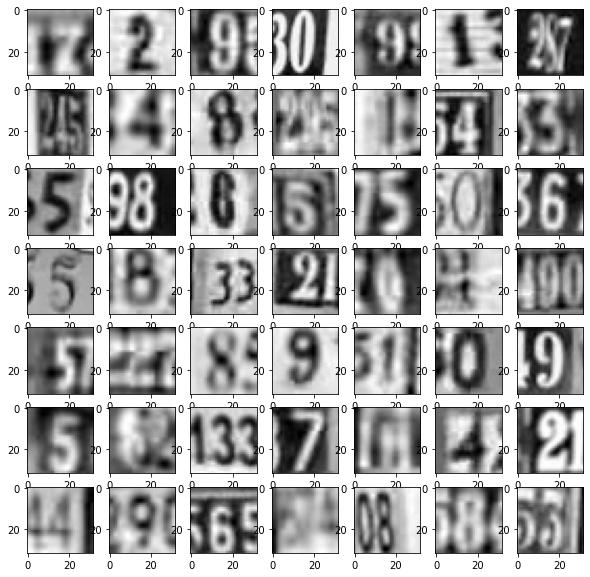

In [45]:
# Data visualisation 
fig=plt.figure(figsize=(10,10))
col=7
ro=7
for i in range(1, col*ro+1):
    image=X_test[i]
    fig.add_subplot(ro,col,i)
    plt.imshow(image,cmap='gray')
plt.show()

Checking 49 images from testing Sets 

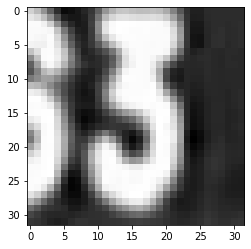

3


In [46]:
# Show a random input with respect to output
i = 900
plt.imshow(X_train[i,:], cmap = 'gray')
plt.show()
print(y_train1[i])

Randomly checking input image with its label

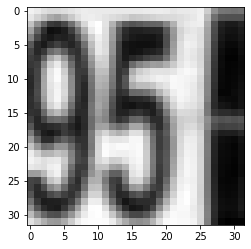

5


In [47]:
# Show a random input
i = 4187
plt.imshow(X_train[i,:], cmap = 'gray')
plt.show()
print(y_train1[i])

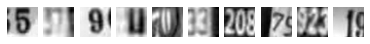

Label of the image is [5 7 9 1 0 3 0 7 2 1] respectively


In [48]:
plt.figure(figsize=(20, 20))
for i in range(21, 31, 1):
    plt.subplot(21, 31, i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.axis('off')
plt.show()
print('Label of the image is %s respectively' % (y_train1[21:31]) )

Checking 10 images selcted from randomly from training sets along with its label.

In [49]:
#Reshaping Data from 2D to 1D
#X_train=np.asarray(X_train).reshape(42000, 1024)
#X_test=np.asarray(X_test).reshape(18000, 1024)
#X_val=np.asarray(X_val).reshape(60000, 1024)

### Implement Deep Neural Network

In [50]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers

In [51]:
print("Value before encoding:", y_train1[0])

Value before encoding: 2


In [52]:
y_train1 = to_categorical(y_train1, num_classes=10)
y_test1 = to_categorical(y_test1, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

print("Shape of y_train:", y_train1.shape)
print("One hot encoded value of y_train:", y_train1[0])

Shape of y_train: (42000, 10)
One hot encoded value of y_train: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [53]:
# Initialize Sequential model
model0 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model0.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Normalize the data
# model.add(tf.keras.layers.BatchNormalization())

### Optimisers

In [54]:
adam_optimiser1=tf.keras.optimizers.Adam(lr=0.01)
adam_optimiser2=tf.keras.optimizers.Adam(lr=0.0001)
sgd_optimiser1=tf.keras.optimizers.SGD(lr=0.01)
sgd_optimiser2=tf.keras.optimizers.SGD(lr=0.0001)

Step 1
#### Optimizer: "adam"  with Learning Rate: 0.01
#### Activation Function: "relu"

In [55]:
#Input Layer
model0.add(tf.keras.layers.Dense(512, activation='relu', name='Input'))

# Hidden layers
model0.add(tf.keras.layers.Dense(256, activation='relu', name='Layer_1'))
model0.add(tf.keras.layers.Dense(128, activation='relu', name='Layer_2'))


# Hidden layers
model0.add(tf.keras.layers.Dense(64, activation='relu', name='Layer_3'))
model0.add(tf.keras.layers.Dense(32, activation='relu', name='Layer_4'))


#Output layer
model0.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [56]:
model0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
Input (Dense)                (None, 512)               524800    
_________________________________________________________________
Layer_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
Layer_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
Layer_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
Layer_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
Output (Dense)               (None, 10)                3

In [57]:
model0.compile(optimizer=adam_optimiser1, loss='categorical_crossentropy', metrics=['accuracy']) # adam Lr=0.01

In [58]:
model0.fit(X_train, y_train1, validation_data=(X_val, y_val), epochs=10, verbose=1 )

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 16s 371us/sample - loss: 9.6227 - accuracy: 0.1004 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 2/10
42000/42000 [==============================] - 14s 341us/sample - loss: 2.3038 - accuracy: 0.0991 - val_loss: 2.3052 - val_accuracy: 0.1000
Epoch 3/10
42000/42000 [==============================] - 13s 306us/sample - loss: 2.3041 - accuracy: 0.0990 - val_loss: 2.3041 - val_accuracy: 0.1000
Epoch 4/10
42000/42000 [==============================] - 13s 305us/sample - loss: 2.3041 - accuracy: 0.1005 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 5/10
42000/42000 [==============================] - 13s 308us/sample - loss: 2.3040 - accuracy: 0.1004 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 6/10
42000/42000 [==============================] - 13s 317us/sample - loss: 2.3041 - accuracy: 0.0976 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 7/10
42000/42000 [====================

In [59]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

In [60]:
#Input Layer
model.add(tf.keras.layers.Dense(512, activation='relu', name='Input'))

# Hidden layers
model.add(tf.keras.layers.Dense(256, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.Dense(128, activation='relu', name='Layer_2'))


# Hidden layers
model.add(tf.keras.layers.Dense(64, activation='relu', name='Layer_3'))
model.add(tf.keras.layers.Dense(32, activation='relu', name='Layer_4'))


#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [61]:
model.compile(optimizer=sgd_optimiser1, loss='categorical_crossentropy', metrics=['accuracy']) # sgd Lr=0.01

In [62]:
model.fit(X_train, y_train1, validation_data=(X_val, y_val), epochs=10, verbose=1 )

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 12s 292us/sample - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/10
42000/42000 [==============================] - 12s 278us/sample - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/10
42000/42000 [==============================] - 12s 290us/sample - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/10
42000/42000 [==============================] - 12s 277us/sample - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/10
42000/42000 [==============================] - 12s 279us/sample - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 6/10
42000/42000 [==============================] - 12s 282us/sample - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 7/10
42000/42000 [==============================] - 12s 282us/sample - los

#### Optimizer: 'adam'
#### Activation: 'relu'
#### Learning Rate: 0.0001

In [63]:
# Initialize Sequential model
modela = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
modela.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

In [64]:
#Input Layer
modela.add(tf.keras.layers.Dense(512, activation='relu', name='Input'))

# Hidden layers
modela.add(tf.keras.layers.Dense(256, activation='relu', name='Layer_1'))
modela.add(tf.keras.layers.Dense(128, activation='relu', name='Layer_2'))


# Hidden layers
modela.add(tf.keras.layers.Dense(64, activation='relu', name='Layer_3'))
modela.add(tf.keras.layers.Dense(32, activation='relu', name='Layer_4'))


#Output layer
modela.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [65]:
modela.compile(optimizer=adam_optimiser2, loss='categorical_crossentropy', metrics=['accuracy']) # adam Lr =.0001

In [66]:
modela.fit(X_train, y_train1, validation_data=(X_val,y_val),batch_size=300, epochs=100, verbose=1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 5s 109us/sample - loss: 6.6712 - accuracy: 0.1326 - val_loss: 2.8684 - val_accuracy: 0.1661
Epoch 2/100
42000/42000 [==============================] - 4s 88us/sample - loss: 2.5661 - accuracy: 0.2045 - val_loss: 2.3231 - val_accuracy: 0.2458
Epoch 3/100
42000/42000 [==============================] - 4s 88us/sample - loss: 2.2111 - accuracy: 0.2720 - val_loss: 2.0583 - val_accuracy: 0.3125
Epoch 4/100
42000/42000 [==============================] - 4s 88us/sample - loss: 1.9971 - accuracy: 0.3367 - val_loss: 1.8868 - val_accuracy: 0.3716
Epoch 5/100
42000/42000 [==============================] - 4s 89us/sample - loss: 1.8088 - accuracy: 0.3966 - val_loss: 1.7249 - val_accuracy: 0.4272
Epoch 6/100
42000/42000 [==============================] - 4s 89us/sample - loss: 1.6713 - accuracy: 0.4494 - val_loss: 1.5823 - val_accuracy: 0.4887
Epoch 7/100
42000/42000 [========================

Epoch 55/100
42000/42000 [==============================] - 4s 87us/sample - loss: 0.5327 - accuracy: 0.8344 - val_loss: 0.5898 - val_accuracy: 0.8264
Epoch 56/100
42000/42000 [==============================] - 4s 87us/sample - loss: 0.5379 - accuracy: 0.8322 - val_loss: 0.6116 - val_accuracy: 0.8178
Epoch 57/100
42000/42000 [==============================] - 4s 87us/sample - loss: 0.5247 - accuracy: 0.8356 - val_loss: 0.6197 - val_accuracy: 0.8182
Epoch 58/100
42000/42000 [==============================] - 4s 88us/sample - loss: 0.5163 - accuracy: 0.8384 - val_loss: 0.6072 - val_accuracy: 0.8195
Epoch 59/100
42000/42000 [==============================] - 4s 88us/sample - loss: 0.5171 - accuracy: 0.8390 - val_loss: 0.6091 - val_accuracy: 0.8184
Epoch 60/100
42000/42000 [==============================] - 4s 87us/sample - loss: 0.5119 - accuracy: 0.8407 - val_loss: 0.6032 - val_accuracy: 0.8222
Epoch 61/100
42000/42000 [==============================] - 4s 87us/sample - loss: 0.5016 - ac

In [68]:
accuracy = modela.evaluate(X_val, y_val, verbose=0)
print("Accuracy of NN with adam optimiser & RELu on Validation data is ", accuracy)

Accuracy of NN with adam optimiser & RELu on Validation data is  [0.44758566667387883, 0.87885]


In [69]:
# All Accuracy of model need to compile for further analysis and conclusion
accuracy_of_val = pd.DataFrame({'Method':['NN with Adam & RELU'], 'Accuracy': accuracy[1]},index={'1'})
accuracy_of_val = accuracy_of_val[['Method', 'Accuracy']]
accuracy_of_val

,Method,Accuracy
1,NN with Adam & RELU,0.87885


Step 2
#### Optimizer: "sgd"  with Learning Rate: 0.001
#### Activation Function: "relu"

In [70]:
# Initialize Sequential model
model1 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model1.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

In [71]:
#Input Layer
model1.add(tf.keras.layers.Dense(512, activation='relu', name='Input'))

# Hidden layers
model1.add(tf.keras.layers.Dense(256, activation='relu', name='Layer_1'))
model1.add(tf.keras.layers.Dense(128, activation='relu', name='Layer_2'))


# Hidden layers
model1.add(tf.keras.layers.Dense(64, activation='relu', name='Layer_3'))
model1.add(tf.keras.layers.Dense(32, activation='relu', name='Layer_4'))


#Output layer
model1.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [72]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
Input (Dense)                (None, 512)               524800    
_________________________________________________________________
Layer_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
Layer_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
Layer_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
Layer_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
Output (Dense)               (None, 10)               

In [73]:
#Compile the model
model1.compile(optimizer=sgd_optimiser2, loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
model1.fit(X_train, y_train1, validation_data=(X_val, y_val),batch_size=300 ,epochs=100, verbose=1 )

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 97us/sample - loss: 4.6444 - accuracy: 0.1004 - val_loss: 2.3660 - val_accuracy: 0.1003
Epoch 2/100
42000/42000 [==============================] - 4s 84us/sample - loss: 2.3397 - accuracy: 0.1014 - val_loss: 2.3263 - val_accuracy: 0.1035
Epoch 3/100
42000/42000 [==============================] - 4s 85us/sample - loss: 2.3197 - accuracy: 0.1053 - val_loss: 2.3161 - val_accuracy: 0.1030
Epoch 4/100
42000/42000 [==============================] - 4s 88us/sample - loss: 2.3123 - accuracy: 0.1050 - val_loss: 2.3108 - val_accuracy: 0.1031
Epoch 5/100
42000/42000 [==============================] - 4s 85us/sample - loss: 2.3083 - accuracy: 0.1049 - val_loss: 2.3078 - val_accuracy: 0.1030
Epoch 6/100
42000/42000 [==============================] - 4s 85us/sample - loss: 2.3056 - accuracy: 0.1050 - val_loss: 2.3057 - val_accuracy: 0.1033
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 4s 84us/sample - loss: 2.1590 - accuracy: 0.1739 - val_loss: 2.1600 - val_accuracy: 0.1729
Epoch 56/100
42000/42000 [==============================] - 4s 84us/sample - loss: 2.1570 - accuracy: 0.1750 - val_loss: 2.1577 - val_accuracy: 0.1743
Epoch 57/100
42000/42000 [==============================] - 4s 84us/sample - loss: 2.1549 - accuracy: 0.1759 - val_loss: 2.1550 - val_accuracy: 0.1745
Epoch 58/100
42000/42000 [==============================] - 4s 85us/sample - loss: 2.1525 - accuracy: 0.1758 - val_loss: 2.1541 - val_accuracy: 0.1763
Epoch 59/100
42000/42000 [==============================] - 4s 83us/sample - loss: 2.1508 - accuracy: 0.1764 - val_loss: 2.1510 - val_accuracy: 0.1765
Epoch 60/100
42000/42000 [==============================] - 4s 86us/sample - loss: 2.1487 - accuracy: 0.1776 - val_loss: 2.1492 - val_accuracy: 0.1769
Epoch 61/100
42000/42000 [==============================] - 4s 89us/sample - loss: 2.1467 - ac

In [75]:
accuracy1 = model1.evaluate(X_val, y_val, verbose=0)
print("Accuracy of NN with SGD Optimiser & RELU on Validation data is ", accuracy1)

Accuracy of NN with SGD Optimiser & RELU on Validation data is  [2.0157232941309613, 0.24983333]


In [76]:
# All Accuracy of model need to compile for further analysis and conclusion
accuracy_of_val1 = pd.DataFrame({'Method':['NN with SGD & RELU'], 'Accuracy': accuracy1[1]},index={'2'})
accuracy_of_val =pd.concat([accuracy_of_val,accuracy_of_val1])
accuracy_of_val = accuracy_of_val[['Method', 'Accuracy']]
accuracy_of_val

,Method,Accuracy
1,NN with Adam & RELU,0.878850
2,NN with SGD & RELU,0.249833


Step 3
#### Optimizer: "adam"  with Learning Rate: 0.0001
#### Activation Function: "sigmoid"

In [77]:
# Initialize Sequential model
model2 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model2.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

In [78]:
#Input Layer
model2.add(tf.keras.layers.Dense(512, activation='sigmoid', name='Input'))

# Hidden layers
model2.add(tf.keras.layers.Dense(256, activation='sigmoid', name='Layer_1'))
model2.add(tf.keras.layers.Dense(128, activation='sigmoid', name='Layer_2'))


# Hidden layers
model2.add(tf.keras.layers.Dense(64, activation='sigmoid', name='Layer_3'))
model2.add(tf.keras.layers.Dense(32, activation='sigmoid', name='Layer_4'))


#Output layer
model2.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [79]:
#Compile the model
model2.compile(optimizer=adam_optimiser2, loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
model2.fit(X_train, y_train1, validation_data=(X_val, y_val),batch_size=300 ,epochs=100, verbose=1 )

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 5s 109us/sample - loss: 2.3132 - accuracy: 0.0982 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/100
42000/42000 [==============================] - 4s 97us/sample - loss: 2.3030 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/100
42000/42000 [==============================] - 4s 97us/sample - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/100
42000/42000 [==============================] - 4s 93us/sample - loss: 2.3026 - accuracy: 0.1008 - val_loss: 2.3024 - val_accuracy: 0.1006
Epoch 5/100
42000/42000 [==============================] - 4s 93us/sample - loss: 2.3023 - accuracy: 0.1054 - val_loss: 2.3016 - val_accuracy: 0.1283
Epoch 6/100
42000/42000 [==============================] - 4s 93us/sample - loss: 2.3007 - accuracy: 0.1140 - val_loss: 2.2986 - val_accuracy: 0.1120
Epoch 7/100
42000/42000 [========================

Epoch 55/100
42000/42000 [==============================] - 4s 91us/sample - loss: 2.0027 - accuracy: 0.2113 - val_loss: 2.0161 - val_accuracy: 0.1968
Epoch 56/100
42000/42000 [==============================] - 4s 91us/sample - loss: 2.0096 - accuracy: 0.2067 - val_loss: 1.9964 - val_accuracy: 0.2174
Epoch 57/100
42000/42000 [==============================] - 4s 91us/sample - loss: 2.0028 - accuracy: 0.2066 - val_loss: 1.9978 - val_accuracy: 0.2161
Epoch 58/100
42000/42000 [==============================] - 4s 99us/sample - loss: 1.9977 - accuracy: 0.2142 - val_loss: 1.9958 - val_accuracy: 0.2165
Epoch 59/100
42000/42000 [==============================] - 4s 96us/sample - loss: 2.0011 - accuracy: 0.2111 - val_loss: 1.9955 - val_accuracy: 0.2216
Epoch 60/100
42000/42000 [==============================] - 4s 91us/sample - loss: 1.9925 - accuracy: 0.2193 - val_loss: 2.0040 - val_accuracy: 0.2121
Epoch 61/100
42000/42000 [==============================] - 4s 92us/sample - loss: 1.9967 - ac

In [81]:
accuracy2 = model2.evaluate(X_val, y_val, verbose=0)
print("Accuracy of NN with Adam Optimiser & Sigmoid on Validation data is ", accuracy2)

Accuracy of NN with Adam Optimiser & Sigmoid on Validation data is  [1.9215358931859334, 0.25305]


In [82]:
# All Accuracy of model need to compile for further analysis and conclusion
accuracy_of_val2 = pd.DataFrame({'Method':['NN with adam & sigmoid'], 'Accuracy': accuracy2[1]},index={'3'})
accuracy_of_val =pd.concat([accuracy_of_val,accuracy_of_val2])
accuracy_of_val = accuracy_of_val[['Method', 'Accuracy']]
accuracy_of_val

,Method,Accuracy
1,NN with Adam & RELU,0.878850
2,NN with SGD & RELU,0.249833
3,NN with adam & sigmoid,0.253050


### Apply Batch Normalisation to all step 1 to 8

In [83]:
model4 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model4.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

Step 1.1
#### Optimizer: "adam"  with Learning Rate: 0.01
#### Activation Function: "relu"

In [84]:
model4.add(tf.keras.layers.Dense(512, activation='relu', name='input'))

# Hidden layers
model4.add(tf.keras.layers.Dense(256, activation='relu', name='Layer_1'))
model4.add(tf.keras.layers.Dense(128, activation='relu', name='Layer_2'))


# Hidden layers
model4.add(tf.keras.layers.Dense(64, activation='relu', name='Layer_3'))
model4.add(tf.keras.layers.Dense(32, activation='relu', name='Layer_4'))


#Output layer
model4.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [85]:
# Adam Optimiser with Lr= 0.0001
model4.compile(optimizer=adam_optimiser2, loss='categorical_crossentropy', metrics=['accuracy']) 

In [86]:
model4.fit(X_train, y_train1, validation_data=(X_val, y_val),batch_size=300, epochs=100, verbose=1 )

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 6s 146us/sample - loss: 1.5876 - accuracy: 0.4694 - val_loss: 1.0787 - val_accuracy: 0.6700
Epoch 2/100
42000/42000 [==============================] - 5s 122us/sample - loss: 0.9845 - accuracy: 0.7014 - val_loss: 0.8863 - val_accuracy: 0.7320
Epoch 3/100
42000/42000 [==============================] - 5s 122us/sample - loss: 0.8314 - accuracy: 0.7495 - val_loss: 0.7707 - val_accuracy: 0.7686
Epoch 4/100
42000/42000 [==============================] - 5s 123us/sample - loss: 0.7372 - accuracy: 0.7793 - val_loss: 0.6940 - val_accuracy: 0.7927
Epoch 5/100
42000/42000 [==============================] - 5s 123us/sample - loss: 0.6713 - accuracy: 0.7983 - val_loss: 0.6392 - val_accuracy: 0.8107
Epoch 6/100
42000/42000 [==============================] - 5s 123us/sample - loss: 0.6223 - accuracy: 0.8115 - val_loss: 0.6097 - val_accuracy: 0.8188
Epoch 7/100
42000/42000 [===================

42000/42000 [==============================] - 5s 123us/sample - loss: 0.1027 - accuracy: 0.9706 - val_loss: 0.2851 - val_accuracy: 0.9398
Epoch 55/100
42000/42000 [==============================] - 5s 120us/sample - loss: 0.1042 - accuracy: 0.9704 - val_loss: 0.2818 - val_accuracy: 0.9420
Epoch 56/100
42000/42000 [==============================] - 5s 123us/sample - loss: 0.1008 - accuracy: 0.9720 - val_loss: 0.2832 - val_accuracy: 0.9408
Epoch 57/100
42000/42000 [==============================] - 5s 121us/sample - loss: 0.0975 - accuracy: 0.9721 - val_loss: 0.2815 - val_accuracy: 0.9428
Epoch 58/100
42000/42000 [==============================] - 5s 121us/sample - loss: 0.0964 - accuracy: 0.9719 - val_loss: 0.3039 - val_accuracy: 0.9370
Epoch 59/100
42000/42000 [==============================] - 5s 122us/sample - loss: 0.0941 - accuracy: 0.9728 - val_loss: 0.2855 - val_accuracy: 0.9423
Epoch 60/100
42000/42000 [==============================] - 5s 124us/sample - loss: 0.0867 - accuracy

In [87]:
accuracy3 = model4.evaluate(X_val, y_val, verbose=0)
print("Accuracy of NN with Adam Optimiser in Batch norm on Validation data is ", accuracy3)

Accuracy of NN with Adam Optimiser in Batch norm on Validation data is  [0.34776900749790174, 0.94631666]


In [88]:
# All Accuracy of model need to compile for further analysis and conclusion
accuracy_of_val3 = pd.DataFrame({'Method':['NN with Adam in Batch Norm(RELU)'], 'Accuracy': accuracy3[1]},index={'4'})
accuracy_of_val =pd.concat([accuracy_of_val,accuracy_of_val3])
accuracy_of_val = accuracy_of_val[['Method', 'Accuracy']]
accuracy_of_val

,Method,Accuracy
1,NN with Adam & RELU,0.878850
2,NN with SGD & RELU,0.249833
3,NN with adam & sigmoid,0.253050
4,NN with Adam in Batch Norm(RELU),0.946317


#### By seeing above accuracy level of Models, Adam Optimiser with RELU has seen better accuracy level than SGD with RELU and Adam with Sigmoid

#### In next step, RELU with Adam optimiser in with Leraning Rate = 0.0001 and adding drop out step in the NN.

#### Optimizer: 'adam'
#### Activation: 'relu'
#### Learning Rate: 0.0001
#### Batch Norm and Drop Out

In [89]:
model5 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model5.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Normalize the data
model5.add(tf.keras.layers.BatchNormalization())

In [90]:
model5.add(tf.keras.layers.Dense(512, activation='relu', name='input'))

# Hidden layers
model5.add(tf.keras.layers.Dense(256, activation='relu', name='Layer_1'))
model5.add(tf.keras.layers.Dense(128, activation='relu', name='Layer_2'))

# Dropout layer
model5.add(tf.keras.layers.Dropout(0.5))


# Hidden layers
model5.add(tf.keras.layers.Dense(64, activation='relu', name='Layer_3'))
model5.add(tf.keras.layers.Dense(32, activation='relu', name='Layer_4'))
# Dropout layer
model5.add(tf.keras.layers.Dropout(0.5))

#Output layer
model5.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [91]:
# Adam Optimiser with Lr= 0.0001
model5.compile(optimizer=adam_optimiser2, loss='categorical_crossentropy', metrics=['accuracy']) 

In [92]:
model5.fit(X_train, y_train1, validation_data=(X_val, y_val),batch_size=300, epochs=100, verbose=1 )

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 6s 152us/sample - loss: 2.2884 - accuracy: 0.1311 - val_loss: 2.1461 - val_accuracy: 0.2961
Epoch 2/100
42000/42000 [==============================] - 5s 127us/sample - loss: 2.0207 - accuracy: 0.2667 - val_loss: 1.6583 - val_accuracy: 0.4751
Epoch 3/100
42000/42000 [==============================] - 6s 131us/sample - loss: 1.7449 - accuracy: 0.3810 - val_loss: 1.3612 - val_accuracy: 0.5960
Epoch 4/100
42000/42000 [==============================] - 6s 150us/sample - loss: 1.5456 - accuracy: 0.4677 - val_loss: 1.1762 - val_accuracy: 0.6557
Epoch 5/100
42000/42000 [==============================] - 6s 148us/sample - loss: 1.4068 - accuracy: 0.5257 - val_loss: 1.0355 - val_accuracy: 0.6996
Epoch 6/100
42000/42000 [==============================] - 6s 143us/sample - loss: 1.2910 - accuracy: 0.5704 - val_loss: 0.9367 - val_accuracy: 0.7375
Epoch 7/100
42000/42000 [===================

42000/42000 [==============================] - 5s 122us/sample - loss: 0.4159 - accuracy: 0.8771 - val_loss: 0.3679 - val_accuracy: 0.8979
Epoch 55/100
42000/42000 [==============================] - 5s 122us/sample - loss: 0.4096 - accuracy: 0.8814 - val_loss: 0.3404 - val_accuracy: 0.9073
Epoch 56/100
42000/42000 [==============================] - 5s 123us/sample - loss: 0.4014 - accuracy: 0.8822 - val_loss: 0.3412 - val_accuracy: 0.9073
Epoch 57/100
42000/42000 [==============================] - 5s 123us/sample - loss: 0.3965 - accuracy: 0.8852 - val_loss: 0.3419 - val_accuracy: 0.9084
Epoch 58/100
42000/42000 [==============================] - 5s 123us/sample - loss: 0.3951 - accuracy: 0.8846 - val_loss: 0.3451 - val_accuracy: 0.9063
Epoch 59/100
42000/42000 [==============================] - 5s 123us/sample - loss: 0.3968 - accuracy: 0.8856 - val_loss: 0.3348 - val_accuracy: 0.9098
Epoch 60/100
42000/42000 [==============================] - 5s 123us/sample - loss: 0.3813 - accuracy

In [93]:
accuracy4 = model5.evaluate(X_val, y_val, verbose=0)
print("Accuracy of NN with Adam Optimiser in Batch norm with Drop out on Validation data is ", accuracy4)

Accuracy of NN with Adam Optimiser in Batch norm with Drop out on Validation data is  [0.3123038103614633, 0.9279]


In [94]:
# All Accuracy of model need to compile for further analysis and conclusion
accuracy_of_val4 = pd.DataFrame({'Method':['NN with Adam in Batch Norm & dropout(RELU)'], 'Accuracy': accuracy4[1]},index={'5'})
accuracy_of_val =pd.concat([accuracy_of_val,accuracy_of_val4])
accuracy_of_val = accuracy_of_val[['Method', 'Accuracy']]
accuracy_of_val

,Method,Accuracy
1,NN with Adam & RELU,0.878850
2,NN with SGD & RELU,0.249833
3,NN with adam & sigmoid,0.253050
4,NN with Adam in Batch Norm(RELU),0.946317
5,NN with Adam in Batch Norm & dropout(RELU),0.927900


### Evaluating NN  on Test Data

In [95]:
model6 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model6.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Normalize the data
model6.add(tf.keras.layers.BatchNormalization())

In [96]:
model6.add(tf.keras.layers.Dense(512, activation='relu', name='input'))

# Hidden layers
model6.add(tf.keras.layers.Dense(256, activation='relu', name='Layer_1'))
model6.add(tf.keras.layers.Dense(128, activation='relu', name='Layer_2'))

# Dropout layer
model6.add(tf.keras.layers.Dropout(0.5))


# Hidden layers
model6.add(tf.keras.layers.Dense(64, activation='relu', name='Layer_3'))
model6.add(tf.keras.layers.Dense(32, activation='relu', name='Layer_4'))
# Dropout layer
model6.add(tf.keras.layers.Dropout(0.5))

#Output layer
model6.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [97]:
# Adam Optimiser with Lr= 0.0001
model6.compile(optimizer=adam_optimiser2, loss='categorical_crossentropy', metrics=['accuracy']) 

In [98]:
model6.fit(X_train, y_train1, validation_data=(X_test, y_test1),batch_size=300, epochs=100, verbose=1 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 5s 117us/sample - loss: 2.2964 - accuracy: 0.1272 - val_loss: 2.1933 - val_accuracy: 0.2492
Epoch 2/100
42000/42000 [==============================] - 5s 107us/sample - loss: 2.0698 - accuracy: 0.2404 - val_loss: 1.6843 - val_accuracy: 0.4834
Epoch 3/100
42000/42000 [==============================] - 4s 104us/sample - loss: 1.7527 - accuracy: 0.3756 - val_loss: 1.3340 - val_accuracy: 0.5953
Epoch 4/100
42000/42000 [==============================] - 4s 98us/sample - loss: 1.5342 - accuracy: 0.4670 - val_loss: 1.1707 - val_accuracy: 0.6447
Epoch 5/100
42000/42000 [==============================] - 4s 97us/sample - loss: 1.3985 - accuracy: 0.5226 - val_loss: 1.0648 - val_accuracy: 0.6792
Epoch 6/100
42000/42000 [==============================] - 4s 97us/sample - loss: 1.2942 - accuracy: 0.5629 - val_loss: 0.9800 - val_accuracy: 0.7002
Epoch 7/100
42000/42000 [======================

42000/42000 [==============================] - 4s 104us/sample - loss: 0.4211 - accuracy: 0.8739 - val_loss: 0.5829 - val_accuracy: 0.8506
Epoch 55/100
42000/42000 [==============================] - 4s 99us/sample - loss: 0.4185 - accuracy: 0.8755 - val_loss: 0.6168 - val_accuracy: 0.8422
Epoch 56/100
42000/42000 [==============================] - 4s 99us/sample - loss: 0.4092 - accuracy: 0.8771 - val_loss: 0.6153 - val_accuracy: 0.8430
Epoch 57/100
42000/42000 [==============================] - 4s 99us/sample - loss: 0.4115 - accuracy: 0.8779 - val_loss: 0.6042 - val_accuracy: 0.8501
Epoch 58/100
42000/42000 [==============================] - 4s 101us/sample - loss: 0.3909 - accuracy: 0.8841 - val_loss: 0.6030 - val_accuracy: 0.8503
Epoch 59/100
42000/42000 [==============================] - 4s 99us/sample - loss: 0.4001 - accuracy: 0.8817 - val_loss: 0.6092 - val_accuracy: 0.8490
Epoch 60/100
42000/42000 [==============================] - 4s 100us/sample - loss: 0.3940 - accuracy: 0.

In [99]:
accuracy5 = model6.evaluate(X_test, y_test1, verbose=0)
print("Accuracy of NN with Adam Optimiser in Batch norm with Drop out on Validation data is ", accuracy4)

Accuracy of NN with Adam Optimiser in Batch norm with Drop out on Validation data is  [0.3123038103614633, 0.9279]
